#**Programação em Python - breve revisão**

##Programação e Algoritmos II

##Prof. Alexandre L. M. Levada

Ex 1. Números primos são muito importantes em diversas aplicações que vão desde fatoração de números inteiros até criptografia de dados. Faça um programa que compute a soma de todos números primos menores que N, onde N é fornecido como entrada. 

a) Compute o valor da soma e o tempo gasto para computá-la se N=1000

b) Compute o valor da soma e o tempo gasto para computá-la se N=10000

c) Compute o valor da soma e o tempo gasto para computá-la se N=100000


In [1]:
import time

# verifica se inteiro n é primo
def verifica_primo(n):
    divisor = 2
    primo = True    
    # o número 1 não é primo!
    if n == 1:
        return False
    # // representa a divisão inteira
    while (divisor <= n//2 ) and (primo):
        if (n % divisor == 0):  
            primo = False   
        else:
            divisor = divisor + 1            
    return primo

####################################
# Inicio do script
####################################
N = int(input('Entre com o valor de N: '))

inicio = time.time()
soma = 0 
for i in range(2, N+1):
    # Só precisa testar se é primo se i for ímpar
    if verifica_primo(i):
        soma = soma + i

print('A soma dos primos menores que %d é %d' %(N,soma))
fim = time.time()
tempo = fim - inicio
print('Tempo: %f segundos' %tempo)

Entre com o valor de N: 10000
A soma dos primos menores que 10000 é 5736396
Tempo: 0.490891 segundos


Ex 2. O número de um CPF tem 9 algarismos e mais dois dígitos verificadores, que são indicados após uma barra. Logo, um CPF tem 11 algarismos. O número do CPF é escrito na forma ABCDEFGHI-JK ou diretamente como ABCDEFGHIJK, onde os algarismos não podem ser todos iguais entre si.

O J é chamado 1° dígito verificador do número do CPF.

O K é chamado 2° dígito verificador do número do CPF.

**Primeiro Dígito**

Para obter J multiplicamos A, B, C, D, E, F, G, H e I pelas constantes correspondentes:

A x 10, B x 9, C x 8, D x 7, E x 6, F x 5, G x 4, H x 3, I x 2

O resultado da soma, S = (10A + 9B + 8C + 7D + 6E + 5F + 4G + 3H + 2I), é dividido por 11. Analisamos então o RESTO dessa divisão:

Se for 0 ou 1, o dígito J é 0 (zero). 

Se for 2, 3, 4, 5, 6, 7, 8, 9 ou 10, o dígito J é (11 - RESTO)

**Segundo Dígito**

Já temos J. Para obter K multiplicamos A, B, C, D, E, F, G, H, I e J pelas constantes: 

A x 11, B x 10, C x 9, D x 8, E x 7, F x 6, G x 5, H x 4, I x 3, J x 2

O resultado da soma, S = 11A + 10B + 9C + 8D + 7E + 6F + 5G + 4H + 3I + 2J, é dividido por 11. Verificamos então o RESTO dessa divisão:

Se for 0 ou 1, o dígito K é 0 (zero). 

Se for 2, 3, 4, 5, 6, 7, 8, 9 ou 10, o dígito K é (11 - RESTO).

Faça uma função em Python que recebe os 9 primeiros dígitos de um CPF e gere os 2 dígitos verificadores. Teste com o seu CPF.

In [2]:
# Os dígitos do CPF formam uma string (sequência de caracteres).
# É preciso converter cada dígito para inteiro para fazer os cálculos
def digito_verificador(cpf):
    
    ############ Cálculo do primeiro dígito
    soma = 0
    # Nesse laço, o valor de i é o multiplicador do dígito
    for i in range(10, 1, -1):
        k = 10 - i      # índice para os dígitos do CPF
        soma = soma + i*int(cpf[k])   
    resto = soma % 11
    
    if resto == 0 or resto == 1:
        primeiro_digito = 0
    else:
        primeiro_digito = 11 - resto
    
    # Anexa o primeiro dígito no CPF
    # Soma de strings = concatenação: ‘ab’ + ‘cd’ = ‘abcd’ 
    cpf = cpf + str(primeiro_digito)
    
    ############ Cálculo do segundo dígito
    soma = 0 
    # Nesse laço, o valor de i é o multiplicador do dígito
    for i in range(11, 1, -1):
        k = 11 - i      # índice para os dígitos do CPF
        soma = soma + i*int(cpf[k])
    resto = soma % 11
    
    if resto == 0 or resto == 1:
        segundo_digito = 0
    else:
        segundo_digito = 11 - resto
        
    # Anexa o segundo dígito no CPF
    cpf = cpf + str(segundo_digito)
    
    return cpf

##############################
# Início do script
##############################
numeros = input('Entre com os 9 primeiros dígitos do CPF: ')
cpf = digito_verificador(numeros)
print('CPF: ', cpf)


Entre com os 9 primeiros dígitos do CPF: 123456789
CPF:  12345678909


Ex 3. Faça uma função que receba como entrada um número inteiro na base 10 e retorne uma lista contendo sua representação em binário (cada elemento da lista é um bit 0 ou 1).

In [ ]:
def decimal_binario(n):
    binario = []
    while n != 0:
        quociente = n // 2
        resto = n % 2
        binario.append(resto)
        n = quociente
    return binario[::-1]

##########################
# Início do script
##########################
n = int(input('Entre com um número inteiro: '))
b = decimal_binario(n)
print('O número %d em binário é: ' %n)
print(b)

Entre com um número inteiro: 123456
O número 123456 em binário é: 
[1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0]


O site Project Euler (https://projecteuler.net/archives) contém uma série de problemas matemáticos desafiadores que podem ser resolvidos através da programação de computadores. O exercício anterior é um deles. O exercício a seguir é o problema 14 da lista do Project Euler.

Ex 4. A maior sequencia de Collatz

Esse é um dos problemas matemáticos mais misteriosos do mundo, principalmente porque não existem provas formais da sua solução. Suponha que seja escolhido um número inteiro qualquer n. A sequencia iterativa a seguir é definida para qualquer n positivo:

n → n/2 , 	se n é par
n → 3n + 1, 	se n é ímpar

Por exemplo, usando o número 13 como entrada, iremos produzir a seguinte sequencia:

13 → 40 → 20 → 10 → 5 → 16 → 8 → 4 → 2 → 1

O fato intrigante é que para todo n, cedo ou tarde a sequencia atinge o número 1 (essa é a conjectura de Collatz). A pergunta é: qual é o número n até 1 milhão, que produz a maior sequencia, isto é, que demora mais para atingir o número 1. Sugestão: armazene a sequencia de cada número numa lista e retorne como saída a maior delas.

In [ ]:
def collatz(n):
    sequencia = [n]
    while n > 1:
        if n % 2 == 0:
            n = n//2
        else:
            n = 3*n+1
        sequencia.append(n)
    return sequencia
    
# Testa as sequencias com todos valores de 1 a 1000000    
maior = 1
lista = []
for i in range(1, 1000001):
    L = collatz(i)
    if len(L) > maior:
        maior = len(L)
        lista = L

print(lista)
print()
print('Tamanho: %d' %maior)

[837799, 2513398, 1256699, 3770098, 1885049, 5655148, 2827574, 1413787, 4241362, 2120681, 6362044, 3181022, 1590511, 4771534, 2385767, 7157302, 3578651, 10735954, 5367977, 16103932, 8051966, 4025983, 12077950, 6038975, 18116926, 9058463, 27175390, 13587695, 40763086, 20381543, 61144630, 30572315, 91716946, 45858473, 137575420, 68787710, 34393855, 103181566, 51590783, 154772350, 77386175, 232158526, 116079263, 348237790, 174118895, 522356686, 261178343, 783535030, 391767515, 1175302546, 587651273, 1762953820, 881476910, 440738455, 1322215366, 661107683, 1983323050, 991661525, 2974984576, 1487492288, 743746144, 371873072, 185936536, 92968268, 46484134, 23242067, 69726202, 34863101, 104589304, 52294652, 26147326, 13073663, 39220990, 19610495, 58831486, 29415743, 88247230, 44123615, 132370846, 66185423, 198556270, 99278135, 297834406, 148917203, 446751610, 223375805, 670127416, 335063708, 167531854, 83765927, 251297782, 125648891, 376946674, 188473337, 565420012, 282710006, 141355003, 4240

#**RECORRÊNCIA LOGÍSTICA**

Um modelo matemático simples, porém capaz de gerar comportamentos caóticos e imprevisíveis.

$$
x_{n+1} = r x_n (1 - x_n)
$$

onde $r$ denota a taxa de crescimento e $x_n \in [0,1]$ denota a proporção de indivíduos vivos na geração n. O termo $(1-x_n)$ tende a zero quando $x_n$ tende a 1, pois representa a limitação dos recursos gerada pela disputa dos indivíduos vivos.

Note que o número de indivíduos no tempo n+1 é uma função quadrática do número de indivíduos no tempo n:

$$
x_{n+1} = f(x_n) = -rx_n^2 + rx_n
$$

ou seja, temos uma parábola com parâmetros $a = -r$, $b = r$ e $c = 0$. Como $a < 0$, a concavidade da prábola é para baixo, ou seja, ela admite um ponto de máximo. Derivando em relação a $x_n$ e igualando a zero, temos:

$$
-2rx_n + r = 0
$$

o que nos leva a:

$$
x_n^{*} = \frac{1}{2}
$$

Note que nesse ponto, o valor da função vale:

$$
f(x_n^{*}) = -\frac{r}{4} + \frac{r}{2} = \frac{r}{4}
$$

Note também que como c = 0, a parábola passa pela origem. Note ainda que f(1) = 0, ou seja, a parábola corta o eixo x no ponto x = 1.




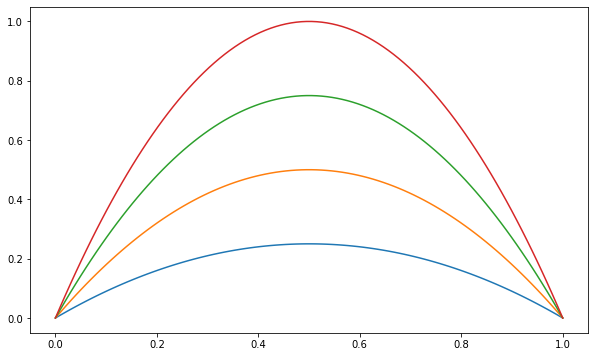

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))

for r in range(1, 5):
  # Parâmetros da parábola
  a, b, c = -r, r, 0

  x = np.linspace(0, 1, num=100)
  y = a*x**2 + b*x + c
  
  plt.plot(x, y)

Vamos simular várias iterações do método em Python para analisar o comportamento do tamanho da população em função do tempo t. O script em Python a seguir mostra uma implementação computacional do modelo utilizando 100 iterações.

Entre com a constante r: 4
Entre com x0: 0.4
População no longo prazo:  0.06428578954058749


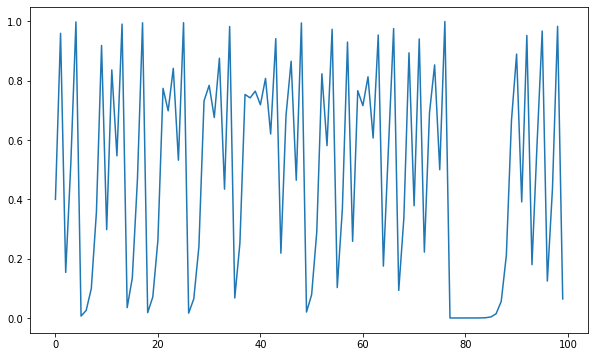

In [ ]:
import matplotlib.pyplot as plt

# Número de iterações para atingir equilíbrio
MAX = 100

r = float(input('Entre com a constante r: '))
x = float(input('Entre com x0: '))

population = [x]

for i in range(1, MAX):
	x = r*x*(1 - x)
	population.append(x)


print('População no longo prazo: ', population[-1])

# Plota gráfico da população pelo tempo
eixox = list(range(MAX))
plt.figure(figsize=(10, 6))
plt.plot(eixox, population)
plt.show()

Execute o script anterior e veja o que acontece para as entradas a seguir:

a) r = 1 e x0 = 0.4	(extinção)

b) r = 2 e x0 = 0.4	(equilíbrio em 50%)

c) r = 2.4 e x0 = 0.6	(pequena oscilação, mas atinge equilíbrio em 58%)	

d) r = 3 e x0 = 0.4	(não há equilíbrio, população oscila, mas em torno de uma média)

e) r = 4 e x0 = 0.4	(comportamento caótico, totalmente imprevisível)

Em seguida, iremos estudar o que acontece com a população de equilíbrio conforme variamos o valor do parâmetro r. A ideia é que no eixo x iremos plotar os possíveis valores de r e no eixo y iremos plotar a população de equilíbrio para aquele valor de r específico. Iremos considerar que a população do equilíbrio é obtida depois de 1000 iterações. O script em Python a seguir mostra a  implementação computacional dessa análise.

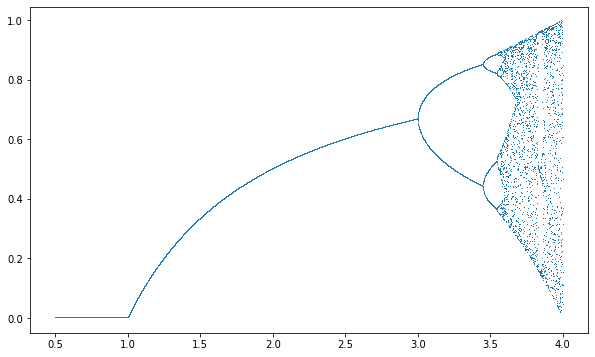

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Cria um vetor com todos os possíveis valores de r
R = np.linspace(0.5, 4, 20000)

#m = 0.5

# Inicializa os eixos x e y vazios
X = []
Y = []
# Loop principal (iterar para todo r em R)
for r in R:
    # Adiciona r no eixo x
    X.append(r)

    # Escolhe um valor aleatório entre 0 e 1
    x = np.random.random()

    # Gera população de equilíbrio
    for l in range(1000):
      x=r*x*(1-x)
    
    Y.append(x)

# Plota o gráfico sem utilizar retas ligando os pontos
plt.figure(figsize=(10, 6))
plt.plot(X, Y, ls='', marker=',')
plt.show()

O gráfico plotado pelo script acima é conhecido como bifurcation map. Esse fenômeno da bifurcação ocorre como uma manifestação do comportamento caótico da população de equilíbrio para valores de r maiores que 3. Na prática, o que temos é que para um valor de r = 3.49999, a população de equilíbrio é muito diferente daquela obtida para r = 3.50000 por exemplo. Pequenas perturbações no parâmetro r causam um efeito devastador na população de equilíbrio. Esse é o lema da teoria do caos, que pode ser parafraseado pela célebre sentença: o simples bater de asas de uma borboleta pode levar ao surgimento de um furação, conhecido também como o efeito borboleta.

Uma das propriedades do caos é que é possível encontrar ordem e padrões em comportamentos caóticos. Por exemplo, a seguir iremos desenvolver um script em Python para plotar uma sequencia de populações, começando de uma população inicial arbitrária e utilizando o valor de r = 3.99.

A seguir, iremos plotar cada subsequência  como um ponto no espaço $R^3$. Na prática, isso significa que no eixo X iremos plotar a sequência original, no eixo Y iremos plotar a sequência deslocada de uma unidade e no eixo Z iremos plotar a sequência deslocada de duas unidades. Qual será o gráfico formado? Se de fato a sequência for completamente aleatória, nenhum padrão deverá ser observado, apenas pontos dispersos aleatoriamente pelo espaço. Mas, surpreendentemente, temos a formação do seguinte padrão, conhecido como o atrator do modelo.

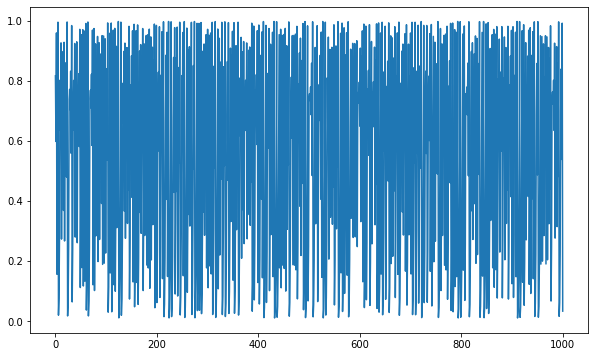

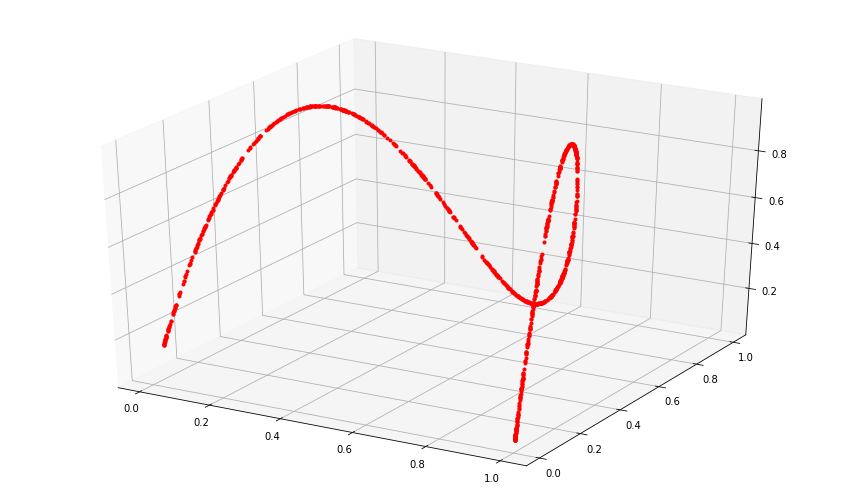

In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

def atrator(X):
    A = X[:len(X)-2]
    B = X[1:len(X)-1]
    C = X[2:]
    #Plota atrator em 3D
    fig = plt.figure(2, figsize=(15, 9))
    ax = fig.add_subplot(111, projection='3d')
    ax.plot(A, B, C, '.', c='red')
    plt.show()

############################    
# Início do script
############################
r = 3.99
x = np.random.random()
X = [x]

for i in range(1000):
    x = r*x*(1 - x)
    X.append(x)

# Plota o gráfico da sequência
plt.figure(figsize=(10, 6))
plt.plot(X)
plt.show()

# Plota atrator do modelo
atrator(X)

Interessante, não é mesmo? Dentro do caos, há ordem. Muitos fenômenos que observamos no mundo real parecem ser aleatórios, mas na verdade exibem comportamento caótico. A pergunta que fica é justamente essa: como distinguir um sistema aleatório de um sistema caótico? Como identificar os padrões que nos permitem enxergar a ordem em um sistema caótico? Para responder a esse questionamento precisamos mergulhar fundo na matemática dos sistemas complexos e da teoria do caos.

Link para o ambiente de execução (Google Colab):
https://colab.research.google.com/drive/110lbskzTs18K7u4ydSZj8t484wM-MC1K?usp=sharing


"If you feel like you're losing everything, remember that trees lose their leaves every year and they still stand tall and wait for better days to come."
-- Author Unknown